In [1]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Input, Flatten, Conv2D, MaxPooling2D


In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

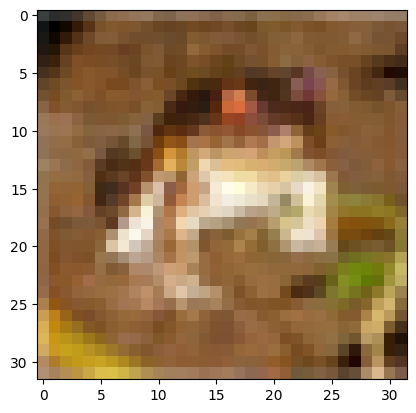

In [4]:
from matplotlib import pyplot as plt
plt.imshow(x_train[0])

In [5]:
y_train[0]

array([6], dtype=uint8)

In [6]:
model = Sequential()

model.add(Conv2D(filters=96,kernel_size=11,strides=4, activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(3,3),strides=2))

model.add(Conv2D(filters=256,strides=1,kernel_size=5, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(3, 3),strides=2))

model.add(Conv2D(filters=384,kernel_size=3, strides=1, padding='same',activation='relu'))
model.add(Conv2D(filters=384,kernel_size=3, strides=1, padding='same',activation='relu'))

model.add(Conv2D(filters=256,kernel_size=3, strides=1, padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3),strides=2,padding='same'))

model.add(Flatten())
model.add(Dense(units=4096, activation='relu'))
model.add(Dropout(rate=0.30))
model.add(Dense(units=4096, activation='relu'))
model.add(Dropout(rate=0.30))

model.add(Dense(10, activation='softmax'))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 8, 8, 96)       │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 3, 3, 96)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 3, 3, 256)      │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 1, 1, 384)      │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 1, 1, 384)      │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 1, 1, 256)      │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │     1,052,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │        40,970 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,622,154 (82.48 MB)

 Trainable params: 21,622,154 (82.48 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

In [13]:
model_train=model.fit(x_train, y_train, epochs=10,verbose='auto',validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - loss: 1.5212 - sparse_categorical_accuracy: 0.4546 - val_loss: 1.5391 - val_sparse_categorical_accuracy: 0.4489
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - loss: 1.4945 - sparse_categorical_accuracy: 0.4647 - val_loss: 1.5101 - val_sparse_categorical_accuracy: 0.4650
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - loss: 1.4736 - sparse_categorical_accuracy: 0.4758 - val_loss: 1.4922 - val_sparse_categorical_accuracy: 0.4739
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - loss: 1.4530 - sparse_categorical_accuracy: 0.4833 - val_loss: 1.4591 - val_sparse_categorical_accuracy: 0.4827
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - loss: 1.4283 - sparse_categorical_accuracy: 0.4920 - val_loss: 1.4649 - val_sparse_categorical_accuracy: 0.4790
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - loss: 1.4070 - sparse_categorical_accuracy: 0.5024 - val_loss: 1.4795 - val_sparse_categorical_acc

In [9]:
pred=model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.5337 - sparse_categorical_accuracy: 0.4576


In [10]:
pred=model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


In [11]:
import numpy as np
np.argmax(pred[0])

np.int64(5)

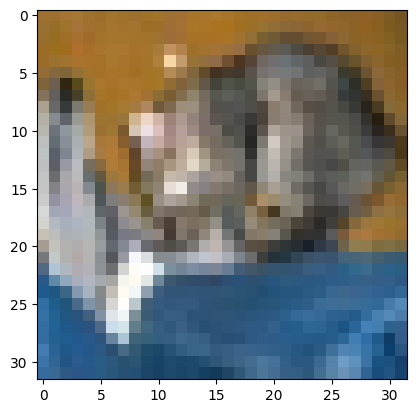

In [12]:
plt.imshow(x_test[0])

NORMALIZATION

In [14]:
x_train=x_train/255
x_test=x_test/255

In [ ]:
x_test[0]

In [15]:
model_train_nor=model.fit(x_train, y_train, epochs=10,verbose='auto',validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - loss: 1.5623 - sparse_categorical_accuracy: 0.4593 - val_loss: 1.4465 - val_sparse_categorical_accuracy: 0.5035
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - loss: 1.2411 - sparse_categorical_accuracy: 0.5666 - val_loss: 1.4148 - val_sparse_categorical_accuracy: 0.5098
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - loss: 1.1962 - sparse_categorical_accuracy: 0.5804 - val_loss: 1.4194 - val_sparse_categorical_accuracy: 0.5187
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - loss: 1.1557 - sparse_categorical_accuracy: 0.5918 - val_loss: 1.4185 - val_sparse_categorical_accuracy: 0.5256
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - loss: 1.1258 - sparse_categorical_accuracy: 0.6064 - val_loss: 1.4204 - val_sparse_categorical_accuracy: 0.5211
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - loss: 1.0786 - sparse_categorical_accuracy: 0.6220 - val_loss: 1.4096 - val_sparse_categorical_ac